# <p style="text-align:center;">Supervisado</p>

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

<span style="color:blue">*Se recomienda hacer uso de las herramientas vistas en los demos de la materia.*</span>

**Objetivos:** 
- Implementar los modelos random forest y redes neuronales para clasificar las galaxias en tipo Elípticas y Espirales e Irregulares
- Comparar la performance obtenida con los modelos vistos en el anterior práctico y los nuevos modelos de este práctico.

# Paquetes necesarios 

# Data set

Se continua con el dataset previamente curado y usado en el anterior práctico. 
Las variables físicas que caracterizan a las galaxias son:
- **distancia_L**: Es la distancia a la galaxia, su calculo hace uso del brillo de la galaxia
- **Mag_abs**: Es el brillo que tendría la galaxia a una distancia fija (10 Mpc)
- **objID**: Es el id de las galaxias
- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **modelMag_u,modelMag_g, modelMag_r,modelMag_i,modelMag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **petroR90_r** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendrán el valor 0. 



<span style="color:red">**Cargue el conjunto de datos obtenido en la parte1.**</span>  


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report


from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units
from astroquery.skyview import SkyView
from astropy import units as u

# Target

Usen como Target la clase de tipo morfológico de las galaxias.

In [7]:
def galaxy_morf(row):
    if row["elliptical"]:
        return "E"
    elif row["spiral"]:
        return "S"
    else:
        return "I"
    
def num_type(row):
    if row["type"] == "I":
        return 1
    elif row["type"] == "S":
        return 2
    else:
        return 3

In [9]:
data = pd.read_csv('galaxias_2.csv') #usamos el dataset curado en el entregable 2
data.head(10)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs
0,1.237674e+18,119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,1.0,0.0,0.0,135.131916,-21.191136
1,1.237674e+18,118.185239,33.699089,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,0.0,0.0,1.0,153.893111,-18.473102
2,1.237658e+18,129.109544,4.654070,17.07165,15.83995,15.33272,15.07332,14.92688,17.837670,-1.738927,0.0,1.0,0.0,84.249297,-19.301402
3,1.237674e+18,120.110719,42.078653,19.79620,17.75608,17.02625,16.65317,16.40043,7.058877,-2.769947,0.0,0.0,1.0,97.626611,-17.957224
4,1.237651e+18,122.677351,48.918774,18.47516,17.39154,16.99343,16.77378,16.65345,7.496475,-1.481728,0.0,0.0,1.0,119.172834,-18.383764
5,1.237658e+18,122.189022,37.330341,19.01056,17.81912,17.38598,17.09107,16.96071,7.394811,-1.624582,0.0,0.0,1.0,126.403332,-18.125019
6,1.237658e+18,125.727647,4.312471,19.62410,17.80488,17.01490,16.59137,16.47210,4.984677,-2.609200,0.0,0.0,1.0,85.838714,-17.690295
7,1.237662e+18,254.177384,19.697629,19.42895,17.78255,17.12358,16.75121,16.47890,7.947685,-2.305372,0.0,0.0,1.0,152.411164,-18.839109
8,1.237666e+18,206.199904,25.455504,17.15307,16.34328,16.07546,15.88867,15.74999,12.176090,-1.077606,0.0,1.0,0.0,116.925709,-19.241798
9,1.237664e+18,24.422490,1.025748,18.98651,17.05614,16.19533,15.78131,15.44931,7.826744,-2.791182,0.0,1.0,0.0,136.929407,-19.562757


In [35]:
# Clases
data["type"] = data.apply(galaxy_morf, axis=1)

In [36]:
# variable Númerica**

data["target"] = data.apply(num_type, axis=1)


display(data.head(10))
display (data.shape)
data.describe()

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs,type,target
0,1.237674e+18,119.822479,42.008528,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,1.0,0.0,0.0,135.131916,-21.191136,E,3
1,1.237674e+18,118.185239,33.699089,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,0.0,0.0,1.0,153.893111,-18.473102,I,1
2,1.237658e+18,129.109544,4.654070,17.07165,15.83995,15.33272,15.07332,14.92688,17.837670,-1.738927,0.0,1.0,0.0,84.249297,-19.301402,S,2
3,1.237674e+18,120.110719,42.078653,19.79620,17.75608,17.02625,16.65317,16.40043,7.058877,-2.769947,0.0,0.0,1.0,97.626611,-17.957224,I,1
4,1.237651e+18,122.677351,48.918774,18.47516,17.39154,16.99343,16.77378,16.65345,7.496475,-1.481728,0.0,0.0,1.0,119.172834,-18.383764,I,1
5,1.237658e+18,122.189022,37.330341,19.01056,17.81912,17.38598,17.09107,16.96071,7.394811,-1.624582,0.0,0.0,1.0,126.403332,-18.125019,I,1
6,1.237658e+18,125.727647,4.312471,19.62410,17.80488,17.01490,16.59137,16.47210,4.984677,-2.609200,0.0,0.0,1.0,85.838714,-17.690295,I,1
7,1.237662e+18,254.177384,19.697629,19.42895,17.78255,17.12358,16.75121,16.47890,7.947685,-2.305372,0.0,0.0,1.0,152.411164,-18.839109,I,1
8,1.237666e+18,206.199904,25.455504,17.15307,16.34328,16.07546,15.88867,15.74999,12.176090,-1.077606,0.0,1.0,0.0,116.925709,-19.241798,S,2
9,1.237664e+18,24.422490,1.025748,18.98651,17.05614,16.19533,15.78131,15.44931,7.826744,-2.791182,0.0,1.0,0.0,136.929407,-19.562757,S,2


(32623, 17)

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,elliptical,spiral,uncertain,distancia_L,Mag_abs,target
count,3.262300e+04,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000,32623.000000
mean,1.237662e+18,177.288294,23.620461,18.373667,16.888166,16.239860,15.903609,15.657005,9.461437,-2.133806,0.114306,0.294516,0.591178,111.823584,-18.969479,1.523128
std,6.022855e+12,66.409157,19.197075,0.991683,1.044239,1.122311,1.173878,1.222213,4.993808,0.525426,0.318187,0.455832,0.491624,26.247110,1.193739,0.691442
min,1.237646e+18,0.013448,-11.182179,14.704220,12.848980,11.981360,11.657850,11.280060,0.842248,-4.982071,0.000000,0.000000,0.000000,60.841980,-22.865193,1.000000
25%,1.237657e+18,147.564880,6.284675,17.700695,16.169435,15.450990,15.073080,14.778060,6.092794,-2.590922,0.000000,0.000000,0.000000,89.872118,-19.821729,1.000000
50%,1.237662e+18,181.856907,21.805872,18.458960,17.042570,16.408970,16.077010,15.827330,8.291302,-2.189131,0.000000,0.000000,1.000000,112.981066,-18.891129,1.000000
75%,1.237666e+18,224.065539,38.065776,19.091840,17.718375,17.162160,16.865420,16.659130,11.341100,-1.687871,0.000000,1.000000,1.000000,135.251067,-18.105317,2.000000
max,1.237680e+18,359.921854,69.028369,25.311900,23.230790,22.057280,24.656410,22.826950,39.948240,-0.224642,1.000000,1.000000,1.000000,155.477681,-13.516647,3.000000


In [48]:
data_rf.isna().sum()

modelMag_u     0
modelMag_g     0
modelMag_r     0
modelMag_i     0
modelMag_z     0
petroR90_r     0
Color          0
distancia_L    0
Mag_abs        0
target         0
dtype: int64

In [49]:
ceros_por_columna = data_rf.eq(0).sum()

print(ceros_por_columna)

modelMag_u     0
modelMag_g     0
modelMag_r     0
modelMag_i     0
modelMag_z     0
petroR90_r     0
Color          0
distancia_L    0
Mag_abs        0
target         0
dtype: int64


In [37]:
print(data.columns)

Index(['objID', 'ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r',
       'modelMag_i', 'modelMag_z', 'petroR90_r', 'Color', 'elliptical',
       'spiral', 'uncertain', 'distancia_L', 'Mag_abs', 'type', 'target'],
      dtype='object')


In [38]:
type_cols      = ['ra','dec','objID','elliptical', 'spiral', 'uncertain', 'type']

# escalar
data_rf      = data.drop(type_cols, axis=1)
# data_clus_cols = data_clus.columns
data_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32623 entries, 0 to 32622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelMag_u   32623 non-null  float64
 1   modelMag_g   32623 non-null  float64
 2   modelMag_r   32623 non-null  float64
 3   modelMag_i   32623 non-null  float64
 4   modelMag_z   32623 non-null  float64
 5   petroR90_r   32623 non-null  float64
 6   Color        32623 non-null  float64
 7   distancia_L  32623 non-null  float64
 8   Mag_abs      32623 non-null  float64
 9   target       32623 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.5 MB


In [41]:
# variables = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z', 'Color', 'distancia_L', 'Mag_abs',]
variables = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'Color', 'distancia_L', 'Mag_abs', ]

In [42]:

data_rfs = data_rf[variables].copy()
data_rfs

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,distancia_L,Mag_abs
0,17.36539,15.46586,14.54658,14.07490,13.69937,18.121160,-2.818807,135.131916,-21.191136
1,19.95136,18.35397,17.54043,17.05026,16.71222,3.657189,-2.410933,153.893111,-18.473102
2,17.07165,15.83995,15.33272,15.07332,14.92688,17.837670,-1.738927,84.249297,-19.301402
3,19.79620,17.75608,17.02625,16.65317,16.40043,7.058877,-2.769947,97.626611,-17.957224
4,18.47516,17.39154,16.99343,16.77378,16.65345,7.496475,-1.481728,119.172834,-18.383764
...,...,...,...,...,...,...,...,...,...
32618,18.28635,16.35437,15.45957,15.04826,14.68787,6.461855,-2.826780,151.586126,-20.534729
32619,19.40030,17.66846,16.84531,16.43551,16.13970,4.905749,-2.554989,142.173048,-18.991187
32620,17.90625,16.28814,15.54940,15.18543,14.88708,14.658280,-2.356849,145.434925,-20.323218
32621,19.52601,17.68973,16.90745,16.50974,16.21097,4.854905,-2.618553,122.177918,-18.582223


In [43]:
data_rfs = StandardScaler().fit_transform(data_rfs)
data_rfs

array([[-1.01674836, -1.36207047, -1.50876743, ..., -1.30372568,
         0.88804785, -1.8611204 ],
       [ 1.59094925,  1.40372726,  1.15884944, ..., -0.52744064,
         1.60284971,  0.41582279],
       [-1.3129564 , -1.00382329, -0.80829135, ...,  0.75155287,
        -1.05058082, -0.2780576 ],
       ...,
       [-0.471344  , -0.57461426, -0.61522248, ..., -0.42450542,
         1.28059268, -1.13405024],
       [ 1.16202541,  0.76761801,  0.59484385, ..., -0.92259282,
         0.39450031,  0.32441092],
       [ 1.16202541,  0.76761801,  0.59484385, ..., -0.92259282,
         0.38925572,  0.32652237]])

In [44]:
data_rfs = pd.DataFrame(data_rfs, columns=variables)
data_rfs

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,Color,distancia_L,Mag_abs
0,-1.016748,-1.362070,-1.508767,-1.557860,-1.601738,1.734119,-1.303726,0.888048,-1.861120
1,1.590949,1.403727,1.158849,0.976821,0.863377,-1.162307,-0.527441,1.602850,0.415823
2,-1.312956,-1.003823,-0.808291,-0.707315,-0.597389,1.677349,0.751553,-1.050581,-0.278058
3,1.434486,0.831158,0.700698,0.638544,0.608270,-0.481115,-1.210733,-0.540905,0.847983
4,0.102346,0.482056,0.671455,0.741291,0.815291,-0.393486,1.241066,0.280007,0.490663
...,...,...,...,...,...,...,...,...,...
32618,-0.088050,-0.511189,-0.695264,-0.728664,-0.792947,-0.600669,-1.318900,1.514954,-1.311237
32619,1.035259,0.747249,0.539475,0.453122,0.394941,-0.912281,-0.801615,1.156315,-0.018185
32620,-0.471344,-0.574614,-0.615222,-0.611810,-0.629953,1.040673,-0.424505,1.280593,-1.134050
32621,1.162025,0.767618,0.594844,0.516357,0.453254,-0.922463,-0.922593,0.394500,0.324411


# División en entrenamiento y evaluación
   - Realizar la respectiva división conjunto de *train* y *test*.

A partir de los datos en las variables `X` e `y` separamos en train y en test:

In [45]:
y = data_rf['target']
y

0        3
1        1
2        2
3        1
4        1
        ..
32618    1
32619    1
32620    2
32621    1
32622    1
Name: target, Length: 32623, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data_rfs, y, train_size=0.8, random_state = 8, stratify = y)

# Radom Forest (RF)

- Seleccione de variables fisicas e implente RF para la clasificación morfologica.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# param_grid = {
# 'n_stimators': [100, 200, 300],
# 'max_depth': [None, 2, 5, 10 ],
# 'min_samples_split': [2, 5, 10],
# 'min_samples_leaf': [1, 2, 4],
# 'max_features': ['sqrt', 'log2'],
# 'class_weight': [None, 'balanced']
# }
# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values between 10 and 200
    'max_depth': randint(5, 50),       # Random integer values between 5 and 50
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': randint(2, 20) # Random integer values between 2 and 20
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for random search
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1   # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your data
random_search.fit(x_train, y_train)

# Get the best hyperparameters found during the search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found during the search
best_model = random_search.best_estimator_

Best Hyperparameters: {'max_depth': 48, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 98}


In [51]:
from sklearn import ensemble

In [59]:
# clf = ensemble.RandomForestClassifier(max_depth= 39, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 5, n_estimators= 129)
# clf.fit(x_train, y_train);
clf = ensemble.RandomForestClassifier(max_depth= 48, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 4, n_estimators= 98)
clf.fit(x_train, y_train);

In [60]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.85      0.80      3857
           2       0.73      0.62      0.67      1922
           3       0.59      0.43      0.50       746

    accuracy                           0.74      6525
   macro avg       0.69      0.64      0.66      6525
weighted avg       0.73      0.74      0.73      6525



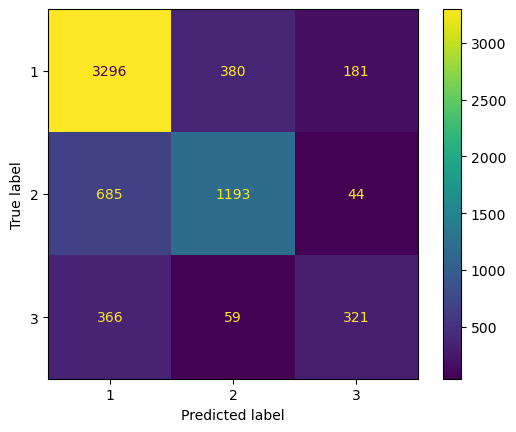

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
RandomForestClassifier?

# Neural Networks

Entrene una red neuronal convolucional sobre el conjunto de imágenes.

In [37]:
coords_gx = SkyCoord(data.ra.iloc[5], data.dec.iloc[5], unit=(u.deg, u.deg))

In [38]:
img = SkyView.get_images(position=coords_gx, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])

In [39]:
display(len(img))
# display(img[0].info())
display(img[0][0].shape)
display(img[0][0].data)

5

(300, 300)

array([[ 0.00790405,  0.00422668,  0.00790405, ...,  0.02609253,
        -0.00785828,  0.02233887],
       [-0.00681305, -0.01417542, -0.01417542, ..., -0.00030327,
         0.01478577,  0.02987671],
       [ 0.00422668,  0.00054741,  0.02630615, ..., -0.00030327,
        -0.0040741 ,  0.00346756],
       ...,
       [ 0.03015137,  0.0007658 , -0.0029068 , ...,  0.00447845,
         0.00080299, -0.00287247],
       [ 0.02279663,  0.00444031,  0.01913452, ..., -0.00654602,
         0.0302124 ,  0.00080395],
       [ 0.04119873, -0.0029068 ,  0.01179504, ..., -0.01757812,
         0.0302124 , -0.03594971]], dtype=float32)

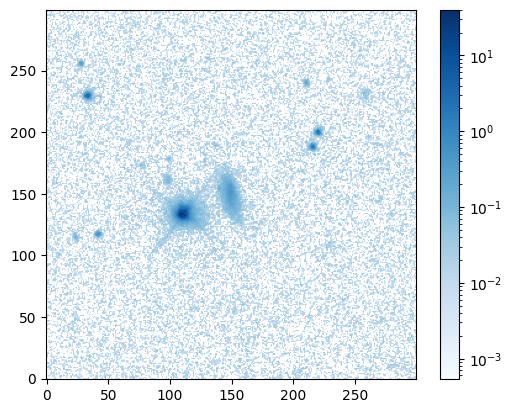

In [40]:
from matplotlib.colors import LogNorm

plt.imshow(img[0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')
plt.colorbar()

In [41]:
   # Initialize an empty DataFrame
   df_images = pd.DataFrame(columns=['Image_ID', 'Image_Data'])

   # Assuming you have a loop for n from 1 to 100
   for n in range(0, 4):
       coords = SkyCoord(data.ra.iloc[n], data.dec.iloc[n], unit=(u.deg, u.deg))
       img = SkyView.get_images(position=coords, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])
#        img = SkyView.get_images(position=coords, survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz'])
       img_data = img[0][0].data.flatten()  # Flatten the image data to 1D array
       df_images.loc[len(df_images)] = [n, img_data]

In [42]:
 df_images

,Image_ID,Image_Data
0,0,"[0.012329102, -0.0152282715, 0.028076172, 0.00..."
1,1,"[0.0067977905, -0.01852417, 0.028503418, -0.02..."
2,2,"[0.0026283264, -0.032226562, -0.029052734, -0...."
3,3,"[-0.01512146, -0.025482178, -0.004760742, -0.0..."


# Conclusiones